In [1]:
import sys, time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
palette = 'magma_r'
%matplotlib inline

# Step 1. 1D linear convection

The following partial differential equation (PDE) describes a wave propagating (convecting) in one spatial dimension. It is the simplest model of fluid dynamics.

$$
\begin{align}
\frac{\delta u}{\delta t} + c \frac{\delta u}{\delta x} &= 0
\end{align}
$$

This equation defines an *implicit function* $u(t, x)$ in terms of its partial derivatives with respect to space and time, which happen to be linearly related. There is an analytic solution for this particular PDE, but that's not always the case for more complex PDEs.

Here are the definitions of the partial derivatives:

$$
\begin{align}
\frac{\delta u}{\delta t} &= \lim_{\Delta t \to 0} \frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} \\
\frac{\delta u}{\delta x} &= \lim_{\Delta x \to 0} \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x}
\end{align}
$$

The finite difference method computes a numerical solution to a PDE by assuming that we can approximate the derivatives by using small values for $\Delta t$ and $\Delta x$ instead of letting them go all the way to zero. In other words, we discretize space and time to a grid, then compute the solution iteratively over multiple steps through time and space based on previous values.

In the equation for 1D linear convection, we can replace the partial derivatives with the following approximations, where $\Delta t$ and $\Delta x$ are some small finite values:

$$
\begin{align}
\frac{\delta u}{\delta t} &\approx \frac{u(t + \Delta t, x) - u(t,x)}{\Delta t} \\
\frac{\delta u}{\delta x} &\approx \frac{u(t, x + \Delta x) - u(t,x)}{\Delta x}
\end{align}
$$

By substituting these into the first equation, we can derive an approximation of $u(t,x)$ in terms of its values at previous points in time:

$$
\begin{align}
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} + c \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} &= 0 \\
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} &= - c \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} \\
u(t + \Delta t,x) - u(t,x) &= - c [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
u(t + \Delta t,x) &= u(t,x) - c [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
\end{align}
$$

We can make this recurrent computation explicit by letting $u_{n,i}$ equal the value of $u(t, x)$ at some time $t=n \Delta t$ and spatial point $x=i \Delta x$. Then we can write the equation as a *finite difference solver*:

$$
\begin{align}
u_{n+1,i} &= u_{n,i} - c(u_{n,i} - u_{n,i-1}) \frac{\Delta t}{\Delta x}
\end{align}
$$

Note that we have chosen to compute this numerical solution using *forward differences* in time and *backward differences* in space. Then we only need to set some initial conditions $u(0, x) = u_0(x)$ and discretization parameters $\Delta x$ and $\Delta t$, and we can compute an approximate solution to the PDE.

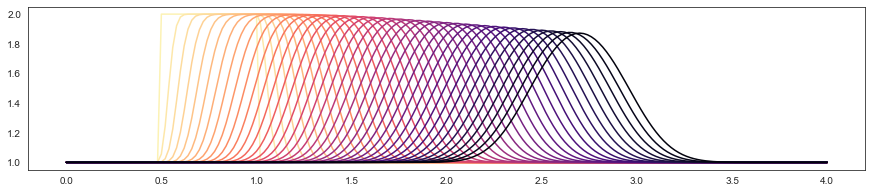

In [2]:
# 1D linear convection
n_t = 400
n_x = 201
dt = 0.005
dx = 0.02
mod = 10

c = 1.0 # the wave speed

# color by time step
sns.set_palette(palette, n_t//mod)

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)

# initial conditions
u = np.ones((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 2.0

plt.figure(figsize=(15,3))
plt.plot(x, u[0])

# finite differences
for n in range(1, n_t):
    u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
    if n%mod == 0:
        plt.plot(x, u[n])

# Step 2. 1D nonlinear convection

The previous convection model assumed a linear relationship between the time and space derivatives. We can extend this to *nonlinear* convection, where the partial derivatives are related through the implicit function $u$ itself:

$$
\begin{align}
\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} &= 0
\end{align}
$$

The process for deriving the finite difference solver for this equation is exactly the same as in step 1. We simply substitute the definitions of the derivatives, and rearrange:

$$
\begin{align}
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} + u(t,x) \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} &= 0 \\
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} &= - u(t,x) \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} \\
u(t + \Delta t,x) - u(t,x) &= - u(t,x) [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
u(t + \Delta t,x) &= u(t,x) - u(t,x) [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
\end{align}
$$

Then we turn this into a recurrent computation of $u$ in terms of previous points in time and space.

$$
\begin{align}
u_{n+1,i} &= u_{n,i} - u_{n,i} (u_{n,i} - u_{n,i-1}) \frac{\Delta t}{\Delta x} \\
u_{n+1,i} &= u_{n,i} \left[1 - (u_{n,i} - u_{n,i-1}) \frac{\Delta t}{\Delta x} \right]
\end{align}
$$

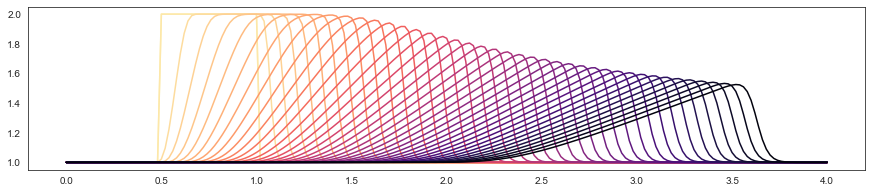

In [3]:
# 1D nonlinear convection
n_t = 400
n_x = 201
dt = 0.005
dx = 0.02

# color by time step
sns.set_palette(palette, n_t//mod+1)

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)

# initial conditions
u = np.ones((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 2.0

plt.figure(figsize=(15,3))
plt.plot(x, u[0])

# finite differences
for n in range(n_t-1):
    u[n+1,1:] = u[n,1:] - u[n,1:] * (u[n,1:] - u[n,:-1]) * dt/dx
    if n%mod == 0:
        plt.plot(x, u[n])

The choice of discretization settings has an impact on the accuracy and stability of the numerical PDE solution. In particular, there is an interaction between the wave speed $c$ and the numerical resolution ($\frac{\Delta x}{\Delta t}$). When the spatial resolution decreases ($\Delta x$ increases), the square wave loses its shape and becomes more rounded with each iteration. This is known as *numerical diffusion*.

As the spatial resolution increases ($\Delta x$ decreases), there is less numerical diffusion, so the square wave stays more square. However, when the $\Delta x < \Delta t$, numerical artifacts are introduced that grow with each iteration, and would eventually lead to mathematical overflow. This is called *numerical instability*.

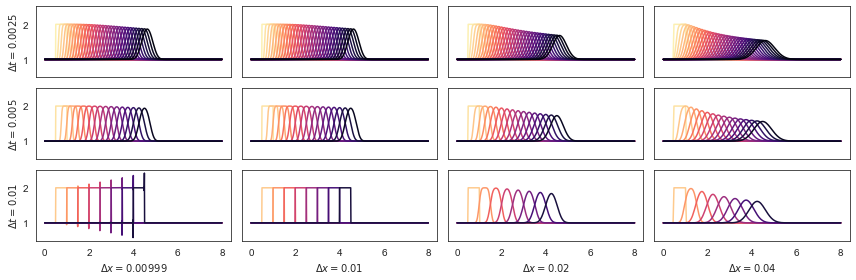

In [4]:
# experiment with grid resolution

def linear_convect(c, dt, dx, ax):
    n_t = int(4/dt)
    n_x = int(8/dx) + 1
    mod = 50
    
    colors = iter(sns.color_palette(palette, n_t//mod))
    x = np.linspace(0, (n_x-1)*dx, n_x)

    # initial conditions
    u = np.ones((n_t, n_x))
    u[0,int(0.5/dx):int(1/dx+1)] = 2.0
    ax.plot(x, u[0], color=next(colors))

    # finite differences
    for n in range(1, n_t):
        u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
        if n%mod == 0:
            ax.plot(x, u[n], color=next(colors))

fig, axes = plt.subplots(3, 4, figsize=(12,4), sharey=True, sharex=True)
for i, dt in enumerate([0.0025, 0.005, 0.01]):
    for j, dx in enumerate([0.00999, 0.01, 0.02, 0.04]):
        linear_convect(c, dt, dx, axes[i,j])
        if j == 0:
            axes[i,j].set_ylabel(f'$\Delta t = {dt}$')
        if i == 2:
            axes[i,j].set_xlabel(f'$\Delta x = {dx}$')
fig.tight_layout()

We can ensure numerical stability by setting the temporal resolution greater than or equal to *Courant's number*, which is the amount of time it would take for the wave to travel between two spatial grid points.

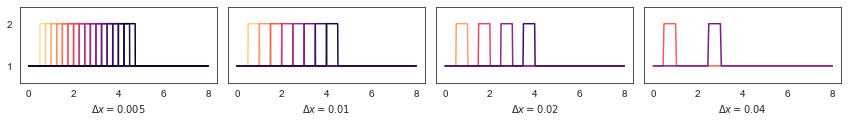

In [5]:
# use Courant number to ensure stability
fig, axes = plt.subplots(1, 4, figsize=(12,1.8), sharey=True)
for i, dx in enumerate([0.005, 0.01, 0.02, 0.04]):
    c = 1.0
    linear_convect(c, dx/c, dx, axes[i])
    axes[i].set_xlabel(f'$\Delta x = {dx}$')
    axes[i].set_ylim(0.6, 2.4)
fig.tight_layout()

# Step 3. 1D diffusion

Another simple fluid dynamics model is diffusion, where a wave dissipates in place rather than propagating forward. This is described by the following PDE:

$$
\begin{align}
\frac{\delta u}{\delta t} &= v \frac{\delta^2 u}{\delta x^2}
\end{align}
$$

Note that this contains a second derivative, so it is a *second-order PDE*. To calculate the second derivative, we can use 3rd degree Taylor polynomials around $u(t, x)$ in either direction to derive a *central difference* approximation:

$$
\begin{align}
u(t, x + \Delta x) &\approx u(t,x) + \Delta x \frac{\delta u(t,x)}{\delta x} + \frac{\Delta x^2}{2!}\frac{\delta^2 u(t,x)}{\delta x^2} + \frac{\Delta x^3}{3!}\frac{\delta^3 u(t,x)}{\delta x^3} \\
u(t, x - \Delta x) &\approx u(t,x) - \Delta x \frac{\delta u(t,x)}{\delta x} + \frac{\Delta x^2}{2!}\frac{\delta^2 u(t,x)}{\delta x^2} - \frac{\Delta x^3}{3!}\frac{\delta^3 u(t,x)}{\delta x^3}
\end{align}
$$

We can add these two Taylor expansions together to cancel out the odd-order terms, then rearrange and solve for an approximation of the second derivative.

$$
\begin{align}
u(t, x + \Delta x) + u(t, x - \Delta x) &\approx 2 u(t,x) + \Delta x^2\frac{\delta^2 u(t,x)}{\delta x^2} \\
\Delta x^2\frac{\delta^2 u(t,x)}{\delta x^2} &\approx u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x) \\
\frac{\delta^2 u(t,x)}{\delta x^2} &\approx \frac{u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x)}{\Delta x^2}
\end{align}
$$

Now we substitute the approximate first and second derivatives into the diffusion equation. We can then derive an approximate definition of $u(t,x)$ in terms of its previous values.

$$
\begin{align}
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} &= v \frac{u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x)}{\Delta x^2} \\
u(t + \Delta t,x) - u(t,x) &= v \left[ u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x) \right] \frac{\Delta t}{\Delta x^2} \\
u(t + \Delta t,x) &= u(t,x) + v  \left[ u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x) \right] \frac{\Delta t}{\Delta x^2}
\end{align}
$$

Again, we turn this into a finite difference solver by letting $u_{n,i}$ equal the value of $u(t, x)$ at some time $t=n \Delta t$ and spatial point $x=i \Delta x$, which allows us to implement the solver in Python.

$$
\begin{align}
u_{n+1,i} &= u_{n,i} + v  (u_{n,i+1} - 2 u_{n,i} + u_{n,i-1}) \frac{\Delta t}{\Delta x^2}
\end{align}
$$


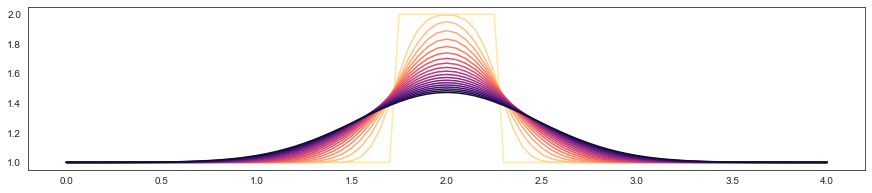

In [6]:
# 1D diffusion
n_t = 200
n_x = 81

dx = 0.05
v = 0.3 # viscosity parameter
sigma = 0.2
dt = sigma * dx**2 / v
mod = 10

# color by time step
sns.set_palette(palette, n_t//mod+1)

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)

# initial conditions
u = np.ones((n_t, n_x))
u[0,int(1.75/dx):int(2.25/dx+1)] = 2.0

plt.figure(figsize=(15,3))
plt.plot(x, u[0])

# finite differences
for n in range(1, n_t):
    u[n,1:-1] = u[n-1,1:-1] + v * (u[n-1,2:] - 2*u[n-1,1:-1] + u[n-1,:-2]) * dt/dx**2
    if n%mod == 0:
        plt.plot(x, u[n])

# Step 4. Burger's equation

If we combine the equations for nonlinear convection and diffusion, we arrive at a slightly more complex fluid dynamics model called Burger's equation (in one dimension).

$$
\begin{align}
\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} &= v \frac{\delta^2 u}{\delta x^2}
\end{align}
$$

We have already defined the approximate terms for the first and second derivatives, so all we need to do is substitute them in and solve for $u$:

$$
\begin{align}
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} + u(t,x) \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} &= v \frac{u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x)}{\Delta x^2} \\
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} &= - u(t,x) \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} + v \frac{u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x)}{\Delta x^2} \\
u(t + \Delta t,x) - u(t,x) &= - u(t,x) [u(t,x + \Delta x) - u(t,x)] \frac{\Delta t}{\Delta x} + v [u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x)] \frac{\Delta t}{\Delta x^2} \\
u(t + \Delta t,x) &= u(t,x) - u(t,x) [u(t,x + \Delta x) - u(t,x)] \frac{\Delta t}{\Delta x} + v [u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x)] \frac{\Delta t}{\Delta x^2} \\
\end{align}
$$

Now we can convert to the finite difference solver:
$$
\begin{align}
u_{n+1,i} &= u_{n,i} - u_{n,i} (u_{n,i} - u_{n,i-1}) \frac{\Delta t}{\Delta x} + v (u_{n,i+1} - 2 u_{n,i} + u_{n,i-1}) \frac{\Delta t}{\Delta x^2} \\
\end{align}
$$

Instead of using a square wave as the inital condition, we will use a saw wave. In addition, we will use periodic boundary conditions to observe the behavior of the model.

c:\users\mtr22\code\miniconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\users\mtr22\code\miniconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\users\mtr22\code\miniconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\users\mtr22\code\miniconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecation

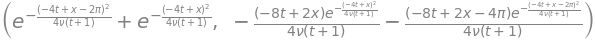

In [7]:
# use sympy to set up fancier initial conditions (a saw wave)
import sympy
sympy.init_printing(use_latex=True)

x, nu, t = sympy.symbols('x nu t')
phi = (
    sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + 
    sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1)))
)
phi_prime = phi.diff(x)

u = -2*nu*(phi_prime / phi) + 4
u_func = sympy.utilities.lambdify((t, x, nu), u)
phi, phi_prime

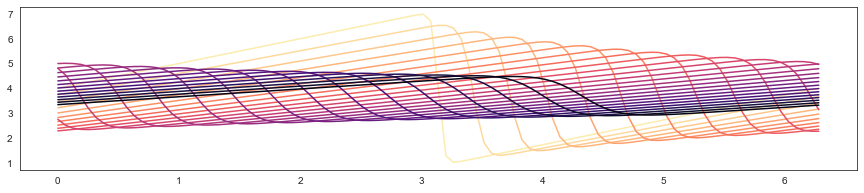

In [8]:
# Burger's equation
n_x = 101
n_t = 500
dx = 2 * np.pi / (n_x - 1)
nu = 0.07
dt = dx * nu

mod = 20

sns.set_palette(palette, n_t//mod)

# initial conditions
x = np.linspace(0, 2*np.pi, n_x)
u = np.zeros((n_t, n_x))
u[0] = [u_func(0, x0, nu) for x0 in x]

plt.figure(figsize=(15,3))
plt.plot(x, u[0])

# finite differences
for n in range(1, n_t):
    i = np.arange(n_x)
    u[n,:] = (
        u[n-1] -
        u[n-1] * (u[n-1] - u[n-1,(i-1)%n_x]) * dt/dx +
        nu * (u[n-1,(i+1)%n_x] + u[n-1,(i-1)%n_x] - 2*u[n-1,:] ) * dt/dx**2
    )
    if n%mod == 0:
        plt.plot(x, u[n])

# Note on second derivative approximation

The first derivative is the slope of a line tangent to a curve at some point, and is interpretted as the rate of change in the function's value for some small perturbation in an argument. The second derivative is the rate of change in the first derivative, in other words, the curvature.

From this interpretation, we can show another way of deriving the second derivative approximation from the first derivative:

$$
\begin{align}
\frac{\delta u(t,x)}{\delta x} &\approx \frac{u(t, x + \Delta x) - u(t, x)}{\Delta x} \approx \frac{u(t, x) - u(t, x - \Delta x)}{\Delta x} \\
\frac{\delta^2 u(t,x)}{\delta x^2} &\approx \frac{\frac{\delta u(t,x + \Delta x)}{\delta x} - \frac{\delta u(t,x)}{\delta x}}{\Delta x} \\
\frac{\delta^2 u(t,x)}{\delta x^2} &\approx \frac{\frac{u(t, x + \Delta x) - u(t, x)}{\Delta x} - \frac{u(t, x) - u(t, x - \Delta x)}{\Delta x}}{\Delta x} \\
\frac{\delta^2 u(t,x)}{\delta x^2} &\approx \frac{u(t, x + \Delta x) - u(t, x) - u(t, x) + u(t, x - \Delta x)}{\Delta x^2} \\
\frac{\delta^2 u(t,x)}{\delta x^2} &\approx \frac{u(t, x + \Delta x) - 2 u(t,x) + u(t, x - \Delta x)}{\Delta x^2}
\end{align}
$$

Intuitively, we approximate the derivative of a function using the difference between neighboring values of the function (divided by the spatial resolution). The second derivative takes the difference between neighboring values of the first derivative, i.e. it is the difference between the difference between two consecutive pairs of values (divided by the spatial resolution squared).